# This code benchmarks to the supplementary dataset of Coogan et al. 
- Slight discrepencies likely reflect different choice of molar masses, e.g., we can recreate their Cr# column better using rounded molar masses

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import sympy as sym
pd.options.display.max_columns = None
import inspect
from functools import partial
import Thermobar as pt

In [2]:
out=pt.import_excel('Supplement_for_Coogan_2014.xlsx', sheet_name="Input_for_PTthermobar")
# All the outputs are stored in a dictioary "out" which searches for all possible minerals (e.g., ol, liq, cpx, plag, amp). 
#The ones you don't have will just be filled with zeros. Then, subsample the ones you want
my_input=out['my_input']
myOls1=out['Ols']
mySps1=out['Sps']

In [5]:
display(mySps1.head())
display(myOls1.head())

,SiO2_Sp,TiO2_Sp,Al2O3_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,Cr2O3_Sp,NiO_Sp
0,0.0,0.248333,40.098667,11.805333,0.168667,19.131667,0.006667,0.000667,0.0,27.107333,0.239000
1,0.0,0.262000,41.726000,11.424000,0.144000,19.511000,0.039000,0.000000,0.0,25.019000,0.259000
2,0.0,0.269375,38.993875,11.416375,0.153375,19.070125,0.009875,0.000625,0.0,26.682125,0.239250
3,0.0,0.241000,37.076000,12.317333,0.163333,18.943000,0.027667,0.004667,0.0,29.626667,0.261333
4,0.0,0.241000,37.076000,12.317333,0.163333,18.943000,0.027667,0.004667,0.0,29.626667,0.261333


,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol
0,40.949250,0.0,0.067000,8.854000,0.144750,49.306500,0.296000,0.000250,0.0,0.059750,0.313750
1,40.939000,0.0,0.041250,8.949750,0.134000,49.520875,0.290000,0.003375,0.0,0.067125,0.329375
2,40.812222,0.0,0.037444,8.573111,0.147667,49.136667,0.291278,0.003000,0.0,0.050833,0.307000
3,40.869357,0.0,0.033500,8.819500,0.143571,49.324143,0.292357,0.003714,0.0,0.052714,0.317929
4,40.862600,0.0,0.052000,8.816200,0.149800,49.052400,0.291400,0.002400,0.0,0.054600,0.300600


## No tool, but comparing to values in the supplement. Discrepencies small, probably related to different molar masses etc. 

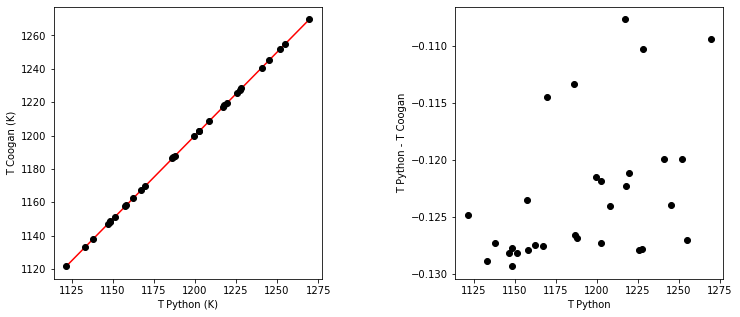

In [6]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['T (°C)'] 
T_py=pt.calculate_ol_sp_temp(ol_comps=myOls1, sp_comps=mySps1, equationT="T_Coogan2014")-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Coogan (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Coogan')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)